In [3]:
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd

# This is commented out
# %matplotlib widget

This notebooks holds some interesting ideas and realated code, mostly in the area Differential Geometry, which I am using to develop different types of distance functions that might be used in HTM Encoders and HTM Topology. 

Differential geometry, similiar to algebraic calulcus, calculus of curves, covers

So let's start with some basics, some curves generated by conics. A conic is a structure that consists of a circles and lines (and note we need to be careful to define these things algebraically). 

First, let's construct a circle. I am going to define a circle as the following function, or parametrisation 

$$e(t)=\left[r\frac{1-t^2}{1+t^2}, \frac{2rt}{1+t^2}\right]$$

The domain of a circle of a circle is,This means, that a circle is defined as the output from a range of points I pass into this function. Note that once we construct the conic, we will move to a slighly different definition, and define the circle as a general conic, simliar to other general conics such as parabolas, hyperbolas and ellipses.

Note that this construction avoids needing to come at the circle using transcendental functions or using parametrisation based on [$\sin{\theta}\cos{\theta}$]. There are range of reasons for doing this, both related to problematic nature real numbers for some tasks, but it also undermines the principles around building encoders (specifically the need for encoders to output consistently)  


Let's create a function

In [61]:
def computeParameterisedPointFromCircle(initialValues, radius):
    x = (radius * (1 - initialValues**2) / (1 + initialValues**2))
    y = ((2 * radius * initialValues) / (1 + initialValues**2))
    return([x, y])

Let's create a list of values, and run the function. We will put some into a data frame to get a sense of them: 

In [62]:
values = np.arange(start=-10, stop=10, step=1)
xValues, yValues =  computeParameterisedPointFromCircle(values, 1)

d = {'initialValues': values, 'xCoord': xValues, 'yCoord':yValues}
df = pd.DataFrame(data=d)
df.head()

,initialValues,xCoord,yCoord
0,-10,-0.980198,-0.198020
1,-9,-0.975610,-0.219512
2,-8,-0.969231,-0.246154
3,-7,-0.960000,-0.280000
4,-6,-0.945946,-0.324324


Let's createa visualisation. Notice the different ranges that I can put into this function to give a sense of how it works

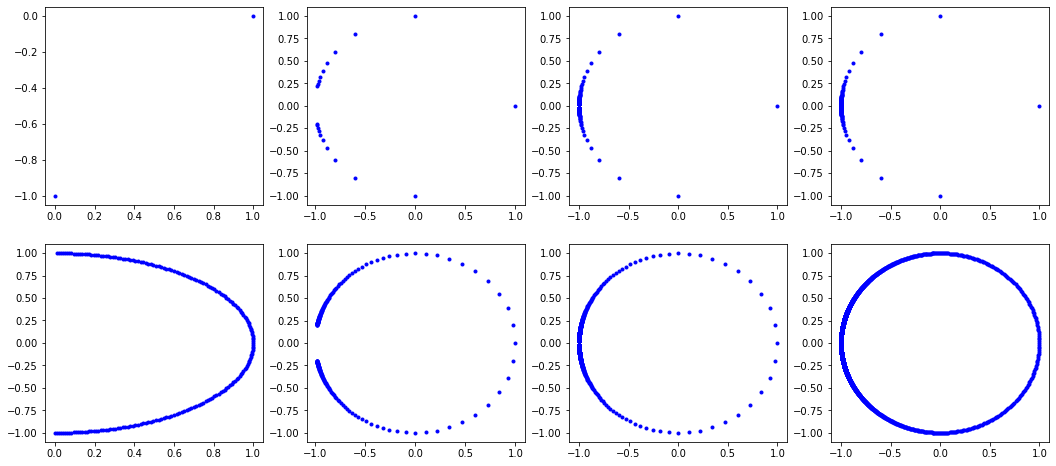

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))


ranges = [
          np.arange(start=-1, stop=1, step=1),
          np.arange(start=-10, stop=10, step=1),
          np.arange(start=-100, stop=100, step=1),
          np.arange(start=-1000, stop=1000, step=1),
          np.arange(start=-1, stop=1, step=.01),
          np.arange(start=-10, stop=10, step=.1),
          np.arange(start=-100, stop=100, step=.1),
          np.arange(start=-1000, stop=1000, step=.01)]

for index, item in enumerate(fig.axes):
    x1, y1 =  computeParameterisedPointFromCircle(ranges[index], radius=1)
    p = item.plot(x1, y1, 'bo', label = "", markersize = 3)


So hot to intuit this, and the meaning of $t$ value in the formula. Its actually the point of intersection  create something that looks like a circle. For a 3d situation, we will need to construct two circes and joing by lines:

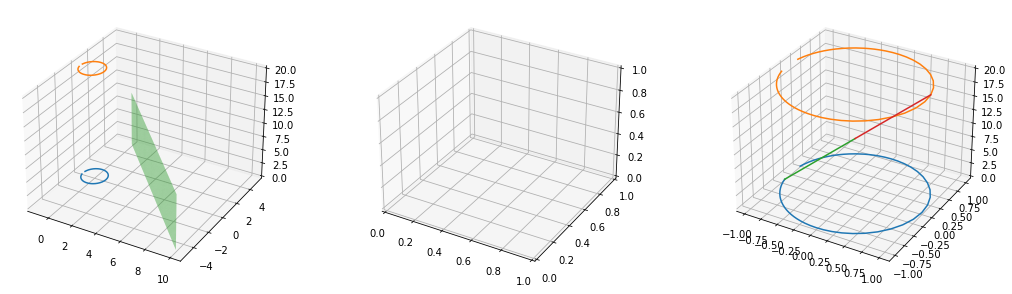

In [92]:
count_of_points = 1
conic_height = 20
conic_center_height = conic_height / 2


x1, y1 =  computeParameterisedPointFromCircle(np.arange(start=-10, stop=10, step=.1), 1)


fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax2 = fig.add_subplot(133, projection='3d')


z = np.zeros(len(x1))
p = ax1.plot(x1, y1, z, label = "")
p = ax1.plot(x1, y1, z +  20, label = "")

p = ax2.plot(x1, y1, z, label = "")
p = ax2.plot(x1, y1, z +  20, label = "")

p = ax3.plot(x1, y1, z, label = "")
p = ax3.plot(x1, y1, z +  20, label = "")

p = [ax2.plot([0,x1[i]],[0,y1[i]], [conic_center_height, 0], label = "") for i in range(count_of_points)]
#p = [ax2.plot([0,-x1[i]],[0,-y1[i]], [conic_center_height, 0], label = "") for i in range(count_of_points)]
#p = [ax2.plot([0,x1[i]],[0,y1[i]], [conic_center_height, conic_height], label = "") for i in range(count_of_points)]
p = [ax2.plot([0,-x1[i]],[0,-y1[i]], [conic_center_height, conic_height], label = "") for i in range(count_of_points)]

xs = np.linspace(0, 10, 100)
zs = np.linspace(0, 10, 100)

X, Z = np.meshgrid(xs, zs)
Y = 5 - X
ax1.plot_surface(X, Y, Z, alpha=0.5)

In [89]:
xs = np.linspace(0, 10, 100)
zs = np.linspace(0, 10, 100)

X, Z = np.meshgrid(xs, zs)
Y = 5 - X

xs

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

So can we say about this structure? It a cone, or double cone, 

- The entire structure is called a cone
- These two parts of the cone are called the nappes.
- The vertex is the point O shared by both nappes.
- The fixed line ℓ which is an axis of symmetry is called the axis of the cone.
- A line m that passes through the vertex and lies on the cone is a generator. 


If we intuit from this that we could take a plane and cut at some point of the cone


So if we slice th cone in different ways we get different structures. But of course, we haven't defined a plane so we need to careful, it might make more sense to use intereections of the points. Let's do things more specifically, will create a lines, and where they intereseect

jg = graphic showing cut by intersection: 

<b>Degenerate cases of conics</b>

Depending on how we instersect the cone, we will get things: circles parabolas, hyperbolas, and so on. There are few specific cases we can get that we should be aware of, called <i>degenerate</i>. Let's start with the ssume that a plane intersects the cone and so we obtain an elipse. Translate this to get smaller and smaller elipses. We ened upw tith a degenerate case at point $0$

For the parabola, as parabola closeer to the edge, the sides get closer and closer and closer, become a double line. consider the example of: 

$$  (3x-2y+5)^2=0  $$

For the hyperbola, when two disctint lines that go doesn the side of the cone, meet at the vertex and becomes degenerate. An example of this is: 

$$  (4x+3y)(4x-3y)=0  $$



Now that we have programmatic way to create a cone structure, and a way of intersecing intersect our cone just using affine lines, in any way we would like So this is qutie poowerful, now supposing we create these structures form moving a plane through

One of the first things to note is that this plane can intersect the plane in any number of ways. Sometimes it the interesectin will result in a ellispse, hyperbola or parabola. Our first question is to explore different classes of definitions. 

<b>Expanding our understanding of the parabola</b>

We have of course looked at parabolas, and circles before in earier notebooks. But each time we have done so we have looked just at $y = x^2$. But there are different ways we might go about constructing this. Let's consider some variations which still are parabolas:

Eurlery newton/ Mange / cauchy / Guass....but earlier lots of interesting in curves - greek

line simplest

conic sections stuff.....put in here.... "slice the cone", parabola, ellipse, hyperbola...named by appolonius...also degenerate conic sections....1 point, 

We can think of them metric defintions - typically involving point and a line (focus and directrix) - relationship 

Diagram 1 - use quadrance is distances**2....

Look (Q, F) = Q(X, l) - condition of parabola

Look (Q, F)/Q(x, l) < 1 - we get an ellipse

Look at (Q, F) / Q(x, L) > 1 - we get a hyperbola


What wasn't really understood was relationship between 2 defiitions (plane slicing cone vs metrical defintions)...... so challenge arises as to when you cut a cone with a plane, where is the focus and directrix

So jg - we have the challnge of how to construct these structures....starting from eith one - 

To do this diagram 3..... 

and then to get directrix, you use equator of shere which cuts ellipse in a line, then get equator of squre on top...

Note that there are other ways to create these structures (so far we have metrical creation, sliciding a cone creatino), but we could also apply an affine transformation - stretch plane in one direction more than the other .....

Also another way we can create it - via the complex plane
we can use cosh z = cosh x cosh iy + sinh x sinch iy for z = x + iy

$$ \cosh{x} \cos{y} + i \sinh{x} sin{y}$$ 





which can also be written as 
$$ \frac{e^z + e^{-z}}{2} $$


If Real part of z is fixed, then y - X + i 

IN 17th Cent - analytic geom took place of greeks (descartes).....

Analytic Geom of Descartes



Conics now have algebraic description - 
line is a form of ax + by + c = 0

Conic is some kidn of degree 2 - ax**2 + bxy + cy**2 + dx....etc...

All conics form part of one big family

Note also - 

Greeks